## Librerias

In [5]:
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot

In [24]:
from importlib import reload
import funciones  

# Recargar el módulo
reload(funciones)

<module 'funciones' from 'c:\\Users\\maria\\Desktop\\Business data\\2º Curso\\Casos practicos\\Reto 8\\R8_Naranja\\funciones.py'>

## Lectura datos

In [7]:
comp_b = pd.read_csv('Datos/Originales/Comp_B.csv')

In [8]:
comp_b.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.746369,13.7,25.883513,90.247441
1,0.746888,13.7,30.497513,94.649142
2,0.747145,13.6,32.975970,97.726040
3,0.747433,13.6,34.000000,99.546341
4,0.747617,13.5,34.000000,101.412499


## Estandarizar el df

In [9]:
x = comp_b.iloc[:,:-1]
y = comp_b.iloc[:, -1]

In [10]:
# Estandarizar el dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [11]:
# Guardo el scaler
with open('Modelos/Comp_b/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Train Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 44)

# Análisis de las variables

In [13]:
y.describe()

count    45966.000000
mean        88.683290
std         22.105677
min         50.394369
25%         68.197637
50%         84.429360
75%        106.868053
max        130.714054
Name: Potencia_Medida, dtype: float64

In [14]:
x.describe()

,Presion,Temperatura,Frecuencia
count,45966.000000,45966.000000,45966.000000
mean,0.756487,12.457936,24.500749
std,0.008911,6.390871,24.536416
min,0.733322,-2.400000,0.000000
25%,0.748004,7.900000,1.000000
50%,0.756621,11.900000,18.000000
75%,0.763981,16.400000,39.057050
max,0.778551,38.300000,100.000000


In [25]:
fun.graficar_correlaciones(X, y)

# Gráfico de distribución

C:\Users\maria\AppData\Local\Temp\ipykernel_8704\3465742560.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(y, shade=False)
c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


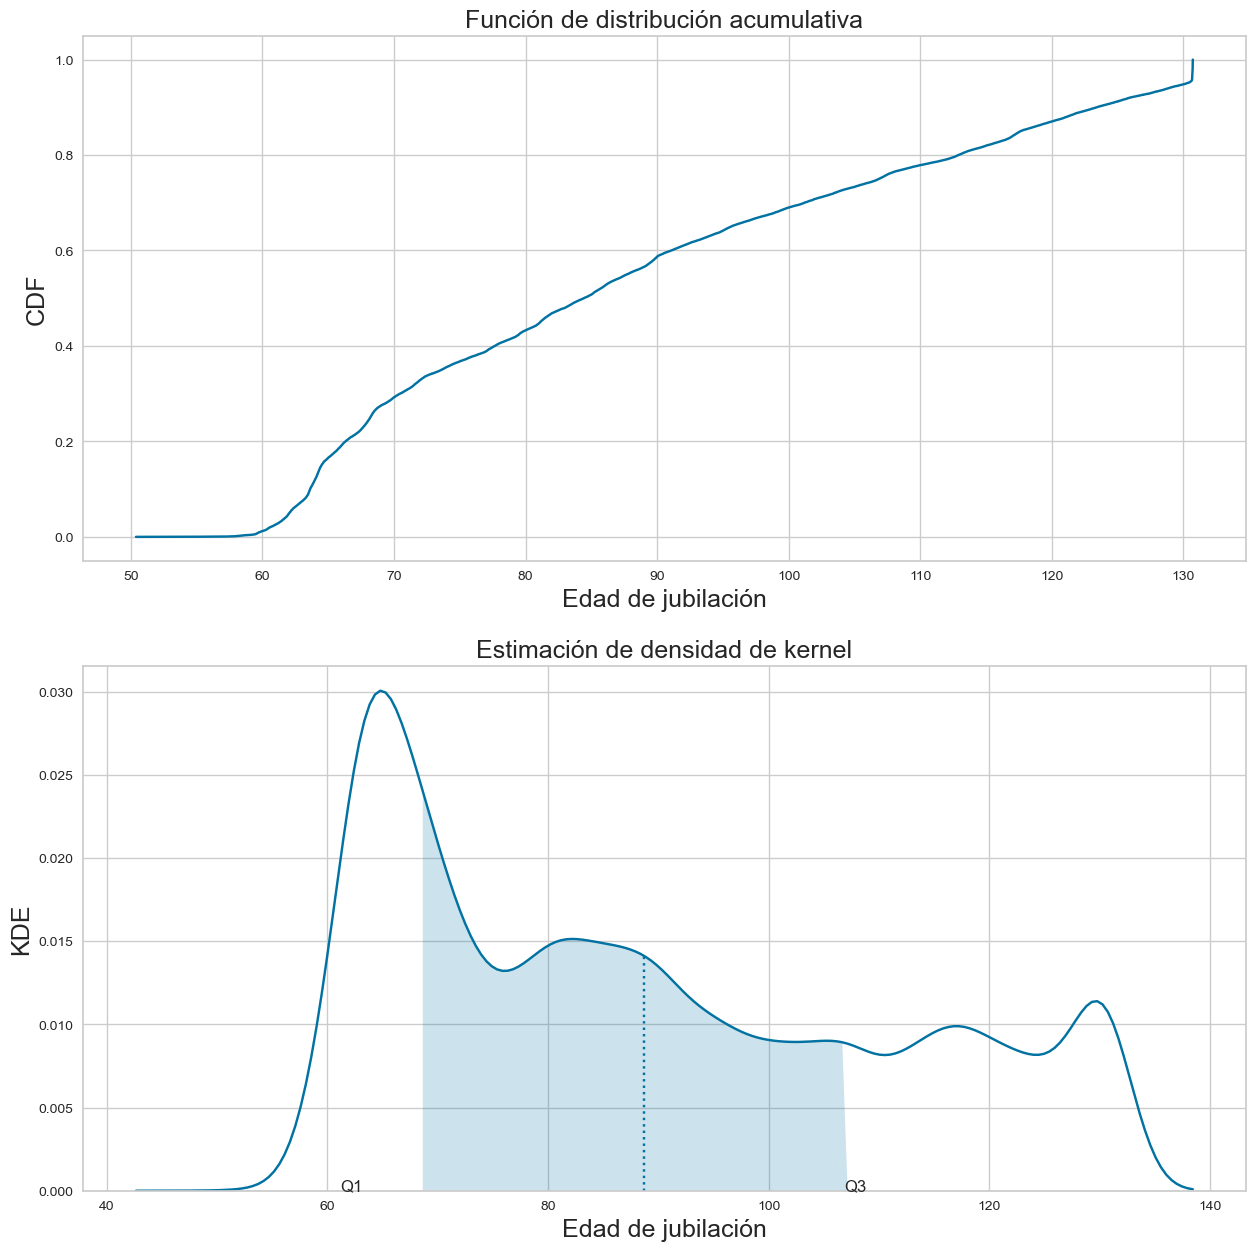

In [22]:
cdf_heating=Cdf.from_seq(y)
fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 15))
ax1.plot(cdf_heating)
ax1.set_xlabel('Edad de jubilación',fontsize=18)
ax1.set_ylabel('CDF',fontsize=18)
ax1.set_title('Función de distribución acumulativa',fontsize=18)


ax = sns.kdeplot(y, shade=False)
kdeline = ax.lines[0]
mean = y.mean()
sdev = y.std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
left = mean - sdev
right = mean + sdev
left,  right = np.percentile(y, [25, 75])
ax2.vlines(mean, 0, height, ls=':')

#ax.fill_between(xs, 0, ys, facecolor='blue', alpha=0.2)
ax2.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, alpha=0.2)
ax2.text(left-7, 0, "Q1")
ax2.text(right, 0, "Q3")
plt.xlabel('Edad de jubilación',fontsize=18)
plt.ylabel('KDE', fontsize=18)
plt.title('Estimación de densidad de kernel',fontsize=18)
plt.show()

## Modelos Base

LinearRegression - R^2: 0.9612181683531726, RMSE: 4.329971202892625


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


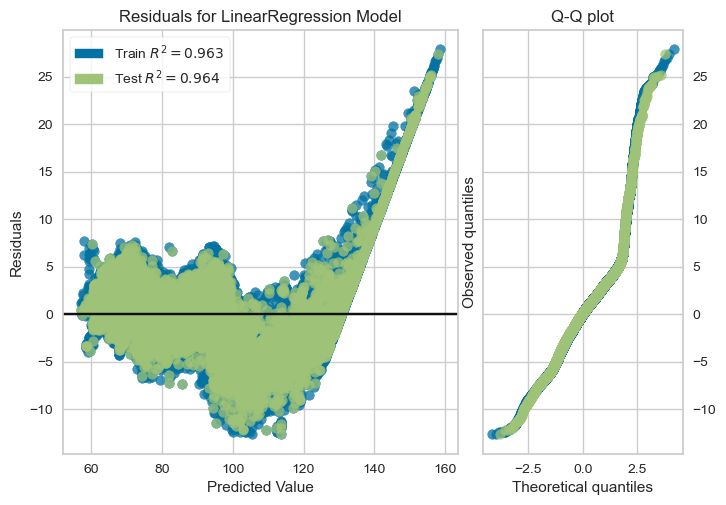

Ridge - R^2: 0.9612156263910234, RMSE: 4.329954880463146


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


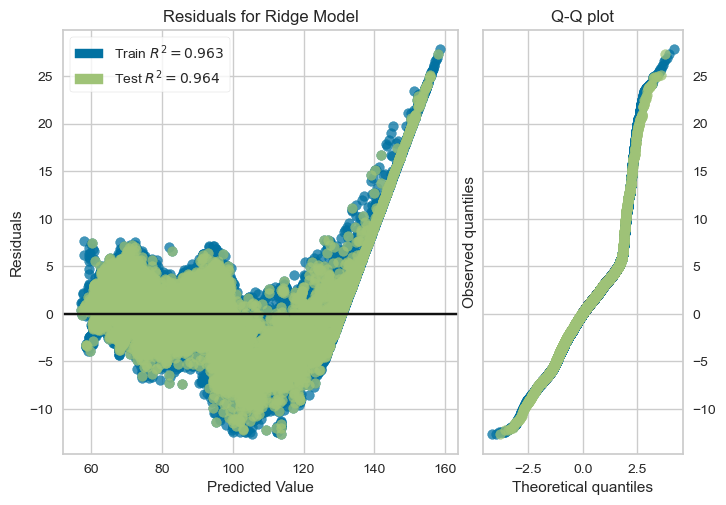

RandomForestRegressor - R^2: 0.9880458289116248, RMSE: 2.3782706523399004


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


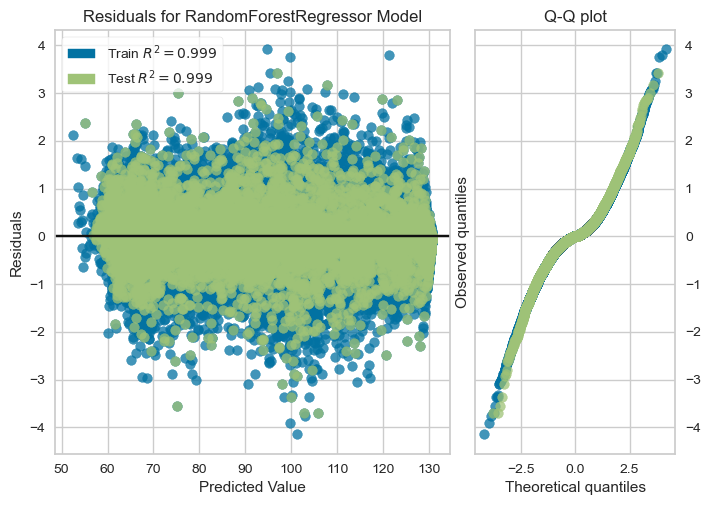

SVR - R^2: 0.9563683979983754, RMSE: 4.616925995654376


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


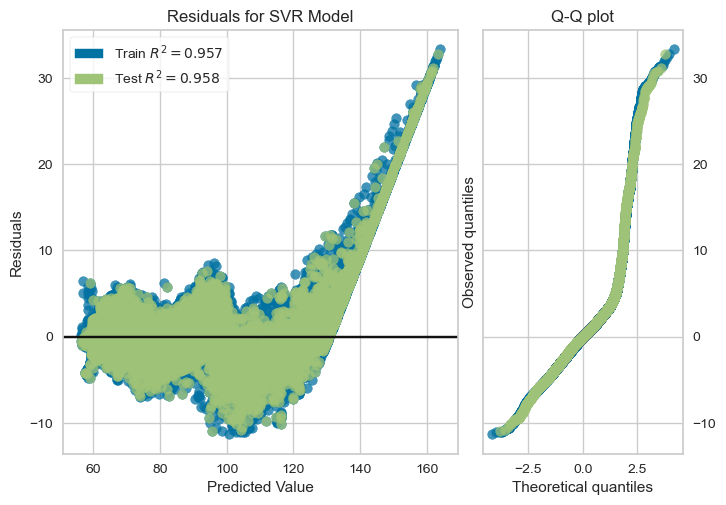

KNeighborsRegressor - R^2: 0.9857524045359177, RMSE: 2.597019230489248


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


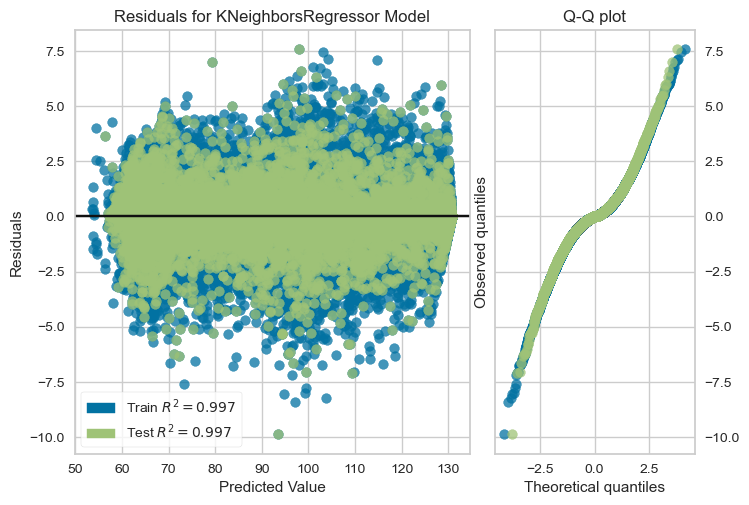

DecisionTreeRegressor - R^2: 0.9827711808878166, RMSE: 2.849252198605445


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


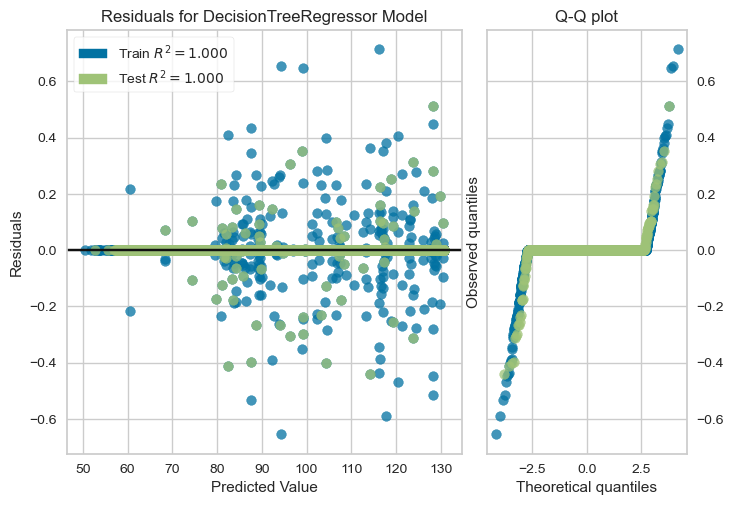

TweedieRegressor - R^2: 0.07290406092474622, RMSE: 21.000419393294287


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but TweedieRegressor was fitted with feature names
  warnings.warn(


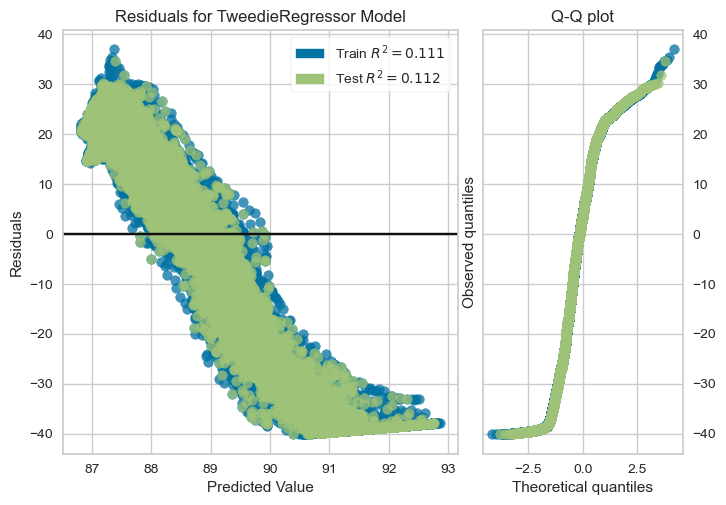

GradientBoostingRegressor - R^2: 0.9895616056054275, RMSE: 2.2229019803633454


c:\Users\maria\.conda\envs\RETO_06_DM\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


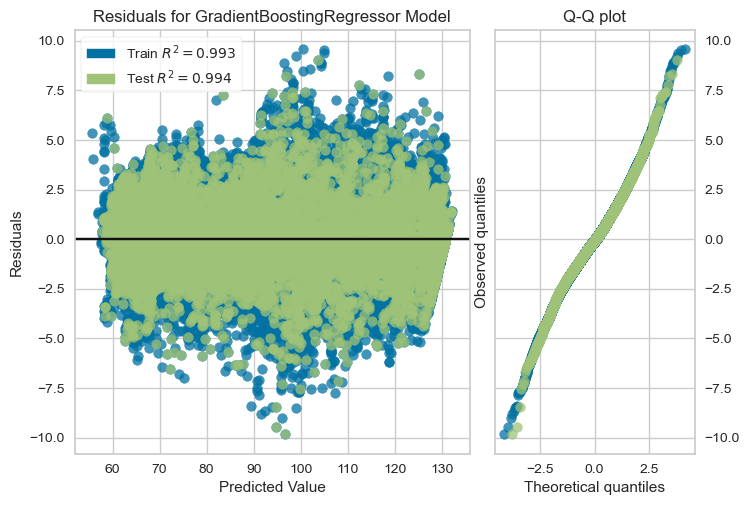

In [19]:
if not os.path.exists('Modelos'):
    os.makedirs('Modelos')

# Definir los modelos
modelos = [LinearRegression(), Ridge(), RandomForestRegressor(random_state=42, n_jobs=-1), svm.SVR(kernel='linear'), KNeighborsRegressor(), DecisionTreeRegressor(random_state=44), TweedieRegressor(), GradientBoostingRegressor(random_state=44)]

# Inicializar el diccionario para almacenar los resultados
resultados_modelos = {}

# Realizar la validación cruzada y calcular la media de las puntuaciones para cada modelo
for modelo in modelos:
    nombre_modelo = type(modelo).__name__
    
    # Calcular R^2
    r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    r2_score_promedio = np.mean(r2_scores)
    
    # Calcular RMSE
    rmse_scores = cross_val_score(modelo, X, y, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_score_promedio = np.sqrt(np.mean(rmse_scores))
    
    # Almacenar los resultados en el diccionario
    resultados_modelos[nombre_modelo] = {'R^2': r2_score_promedio, 'RMSE': rmse_score_promedio}
    
    # Entrenar el modelo con todos los datos
    modelo.fit(X, y)
    
    # Guardar el modelo con pickle en la carpeta 'Modelos'
    ruta_modelo = os.path.join('Modelos/Comp_b', f'{nombre_modelo}_modelo.pkl')
    with open(ruta_modelo, 'wb') as modelo_archivo:
        pickle.dump(modelo, modelo_archivo)

    print(f"{nombre_modelo} - R^2: {r2_score_promedio}, RMSE: {rmse_score_promedio}")

    # Agregar análisis de residuos
    visualizer = ResidualsPlot(modelo, hist=False, qqplot=True)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.score(X_test, y_test)
    visualizer.show()  # Finalize and render the figure